# 2D Schrödinger equation

$$
-\frac{\hbar^2}{2m}(\partial_x^2 + \partial_y^2)\psi(x,y) + V(x,y)\psi(x,y)=E\psi(x,y)
$$

Discretizing it becomes:
    $$
        \left[-\frac{\hbar^2}{2m}(D\oplus D)+V I    \right]\psi=E\psi
    $$
    $(N^2 \times N^2) N^2=N^2$
V is streched them out and put on the main diagonal of I

In [6]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
plt.style.use(['science','notebook'])
from scipy import sparse

In [9]:
#Create a meshgrid for x and y
N=150
X, Y=np.meshgrid(np.linspace(0,1,N,dtype=float),np.linspace(0,1,N,dtype=float))
#remeber rob, meshgrid is a 2d grid where every point tells u where u are in X and in Y

In [10]:
X

array([[0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       ...,
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ]])

In [92]:
def get_potential(x,y):
#    return 0*x
    return np.exp(-(x-0.3)**2/(2*0.1)**2)*np.exp(-(y-0.3)**2/(2*0.1)**2)
V=get_potential(X,Y)
#T=-1/2 D+D.   U=2m\Delta x ?2 V
diag=np.ones([N])
diags=np.array([diag,-2*diag,diag])
diag,diags


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  

In [93]:
D=sparse.spdiags(diags,np.array([-1,0,1]),N,N) #-1,0,1 loc of diags 
T=-1/2*sparse.kronsum(D,D)
U=sparse.diags(V.reshape(N**2),(0)) #stretches the potential, 0 aka main diag
H=U+T

In [94]:
#eig
eigenvalues,eigenvectors = eigsh(H,k=10,which='SM') #10 number of eigenvalue and SM the smallest ones

In [95]:
eigenvalues

array([0.00174027, 0.00295835, 0.0034325 , 0.00396508, 0.00435907,
       0.00542814, 0.00555168, 0.00692527, 0.00750867, 0.00818446])

In [96]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N)) #Transpose as usual and then turn it back to a N*N matrix

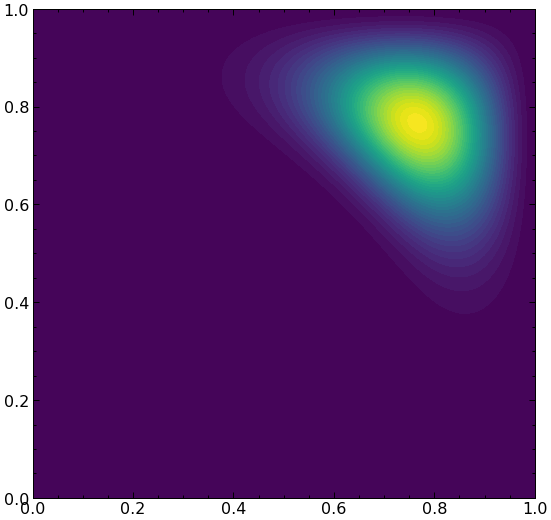

In [97]:
plt.figure(figsize=(9,9))
plt.contourf(X,Y, get_e(0)**2,50)

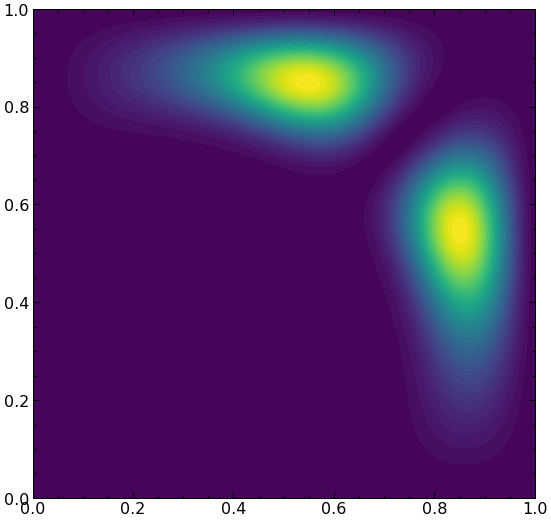

In [98]:
plt.figure(figsize=(9,9))
plt.contourf(X,Y, get_e(1)**2,50)

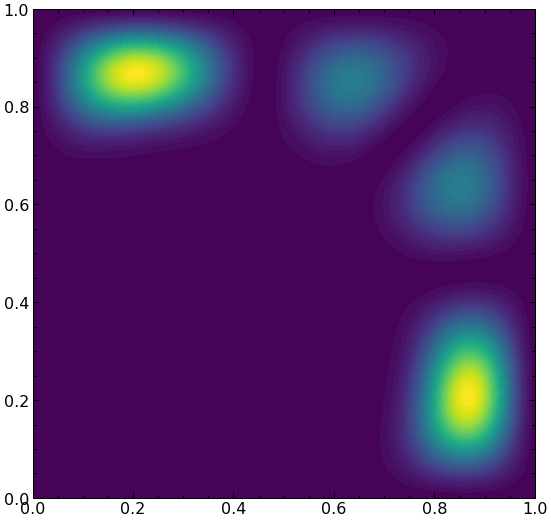

In [99]:
plt.figure(figsize=(9,9))
plt.contourf(X,Y, get_e(3)**2,50)

**Animation code**

/var/folders/7b/mxhdlhl16yjddckjcf2qpms00000gn/T/ipykernel_74063/1253218822.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


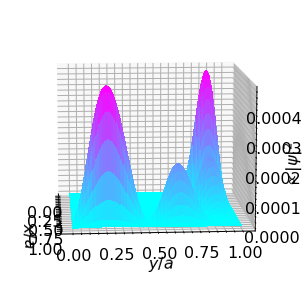

In [105]:
my_cmap = plt.get_cmap('cool')
def init():
    # Plot the surface.
    ax.plot_surface(X, Y, get_e(3)**2, cmap=my_cmap,
                       linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$\propto|\psi|^2$')
    return fig,

def animate(i):
    ax.view_init(elev=10, azim=4*i)
    return fig,

fig = plt.figure()
ax = Axes3D(fig)
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50)
ani.save('animation.gif',writer='pillow',fps=20)

**For infinite square well only**: Note that $E_{n_x, n_y} = \alpha ( n_x^2 + n_y^2 ) $. First energy at $n_x=1$ and $n_y=1$. This means we can find $\alpha = \text{half the lowest eigenvalue}$ and we can plot $E/\alpha$ which should be distributed like $n_x^2 + n_y^2$ for different combinations of $n_x$ and $n_y$.

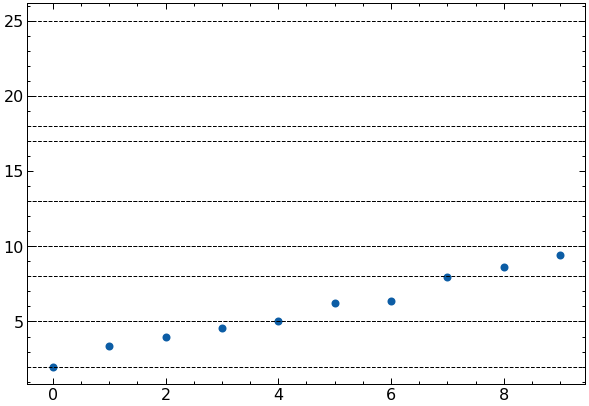

In [101]:
plt.figure(figsize=(10,7))
alpha= eigenvalues[0]/2
E_div_alpha=eigenvalues/alpha
_=np.arange(0,len(eigenvalues),1)
plt.scatter(_,E_div_alpha, lw=2)
[plt.axhline(nx**2+ny**2,ls='--',lw=1., color='black') for nx in range(1,5) for ny in range(1,4)]
plt.show()

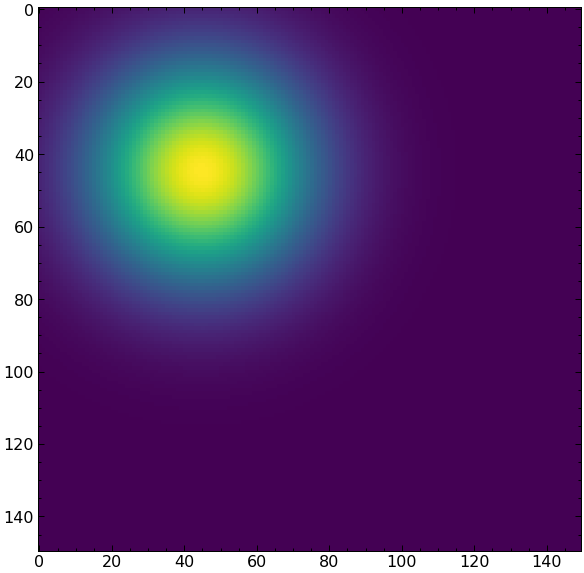

In [104]:
plt.figure(figsize=(10,10))
plt.imshow(get_potential(X,Y))  #imshow revers it